✅ Dataset loaded successfully
   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue           NaN            NYC    NY   
1             59

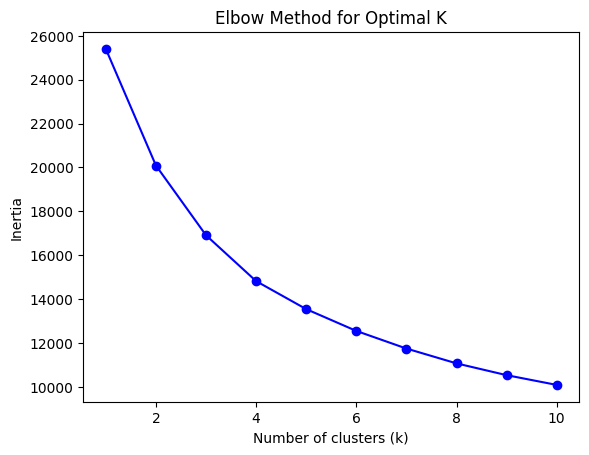

✅ K-Means clustering applied


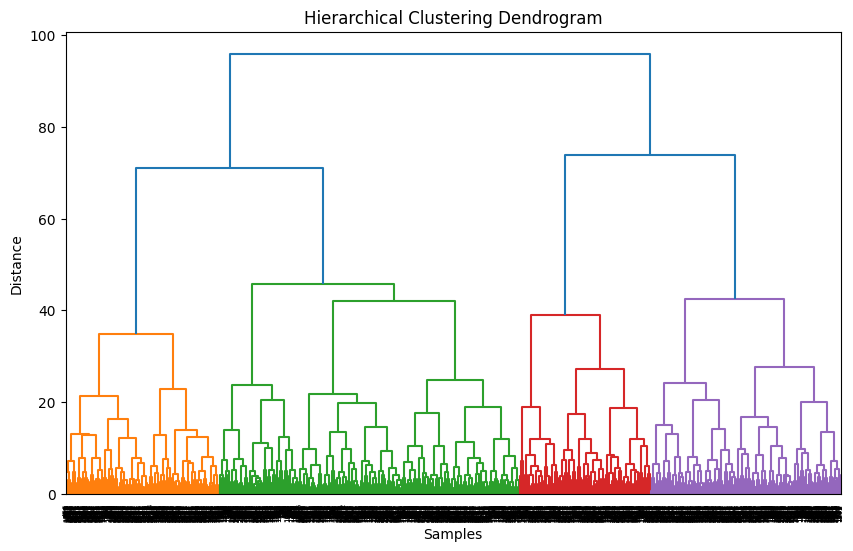

✅ Hierarchical clustering visualization done
Cluster_KMeans
1    1183
2     906
0     734
Name: count, dtype: int64


In [ ]:
# ----------------------------------------
# 1. Download dataset using kagglehub
# ----------------------------------------
# %pip install -q kagglehub scikit-learn pandas numpy matplotlib seaborn scipy


# ----------------------------------------
# 2. Load dataset
# ----------------------------------------
import pandas as pd

df = pd.read_csv("sales_data_sample.csv", encoding='latin1')
print("✅ Dataset loaded successfully")
print(df.head())
print("\nColumns:", df.columns.tolist())

# ----------------------------------------
# 3. Select numerical features for clustering
# ----------------------------------------
# Drop irrelevant/non-numeric columns
df_numeric = df.select_dtypes(include=['float64', 'int64']).dropna()

print("\nUsing columns for clustering:", df_numeric.columns.tolist())

# ----------------------------------------
# 4. Scale data
# ----------------------------------------
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_numeric)

# ----------------------------------------
# 5. Determine optimal number of clusters (Elbow Method)
# ----------------------------------------
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, 'bo-')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()

# ----------------------------------------
# 6. Apply K-Means with chosen k (e.g., k=3)
# ----------------------------------------
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster_KMeans'] = kmeans.fit_predict(X_scaled)
print("✅ K-Means clustering applied")

# ----------------------------------------
# 7. Hierarchical Clustering (optional)
# ----------------------------------------
from scipy.cluster.hierarchy import linkage, dendrogram

plt.figure(figsize=(10, 6))
dendrogram(linkage(X_scaled, method='ward'))
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

print("✅ Hierarchical clustering visualization done")

# ----------------------------------------
# 8. Display cluster sample counts
# ----------------------------------------
print(df['Cluster_KMeans'].value_counts())
